# Estadistica Descriptiva vs Inferencial


## Que hace la estadística?
- Descriptiva
Permite resumir informacion con base en ciertas métricas que describan los datos.
    - Ejemplo: los datos del desempeño de un futbolista a lo largo de su carrera se pueden resumir en metricas que describan de forma rápida, sencilla y corta el historial deportivo de dicho jugador.

- Inferencial 
    - Ejemplo: hace referencia o predicciones a partir de datos.

El estudio humano de los datos tambien conlleva, a mentir con estadística. 
> Con frecuencia se construye un caso estadístico con datos imperfectos. como resultado hay numerosas razones por las cuales individuos intelectuales respetables pueden no estar de acuerdo sobre los resultados estadísticos. _Naked Statistics, Charles Wheelan_

**Entonces por qué aprender Estadística?**

- Resumir grandes cantidades de información
- Mejora la toma de decisiones
- Responder preguntas de relevancia social
- Reconocer patrones en los datos
-  Desenmascarar a los que mienten con estadística






## Roles y Flujo de Trabajo


<img src="./_images/flujo.png" alt="Drawing" style="width: 700px;"/>

Casos en los que se usan estadistica

- Ingesta de datos, validación:
    - Identificar los tipos de datos
    - El flujo de procesamiento que define cuáles van a ser las transformaciones que se deben hacer sobre los datos para que estos queden "limpios".
- Preparación, entrenamiento del modelo:
    - Análisis exploratorio, en este se ocupa la estadística descriptiva
    - Entender si hay correlaciones entre los datos
    - Reducciones de datos.
- Evaluación del modelo, modelo en producción e interaccion con el usuario final
    - Probabilidad
    - Inferencia
    - Test de hipótesis

## Tipos de datos
Cuales son los principales tipos de datos.



Clasificación | Tipo de Dato | 
---------|----------|
 **Categóricos**: son datos cualitativos, representan características como el el idioma, categoría de una película, método de pago, etc. También pueden tomar valores numéricos, por ejemplo: 1 para mujeres y 0 para hombres.| **- Ordinales:** Los datos ordinales representan unidades discretas y ordenadas, como por ejemplo medir características no numéricas como la felicidad. **- Nominales:** tienen valores nominales que representan unidades discretas y se usan para etiquetar variables que no tienen un valor cuantitativo. Estos datos no tienen un orden.
 | **Numéricos**: se conocen como datos cuantitativos, y se refieren a una medida o recuento; en otras palabras, son datos numéricos. | **- Discretos**: son datos discretos cuando son valores únicos y separados. Es decir, cuando los datos solo pueden tomar ciertos valores. Basicamente representan informacion que se puede clasificar. **- Continuos**: los datos continuos representan mediciones, por lo tanto sus valores no se pueden contar, pero si medir |


Vamos a importar un dataset para verificar los tipos de datos que encontrarmos.


In [5]:
#utilizaremos pandas
import pandas as pd

df = pd.read_csv('./sources/datasets/data_nintendo.csv')
df.dtypes

meta_score     float64
title           object
platform        object
date            object
user_score     float64
link            object
esrb_rating     object
developers      object
genres          object
dtype: object

Con esto podemos concluir algo
- Categorical: `object` y `object`
- Numerico: `int64` y `float64`

## Medidas de tendencia Central

<img src="https://www.calculators.org/graphics/mean-median-mode-negatively-skewed-distribution.png" alt="Drawing" style="width: 300px;"/>

- Media: es la sumatoria de un arreglo de datos numeros dividido por la cantidad de valores que existe. Es sensible a valores atípicos.
- Mediana: valor que se encuentra en el medio del arreglo de datos; siempre y cuando los valores se encuentren ordenados de forma ascendente.
- Moda: es el dato que mas se repite dentro del arreglo de datos.

### Diagrama de frecuencia 

<img src="https://static.platzi.com/media/user_upload/Untitled%20%281%29-6c9ab365-1d8c-4325-96ab-37f9687a2371.jpg" style="width: 400px">

Es la representacion gráfica asociada a la tabla de frecuencia, normalmente todos los estadísticos descriptivos se pueden representar en términos de esta distribución

## Práctica

Vamos a analizar de forma rapida un dataset de autos de segunda mano. Tomaremos un cuenta algunos datos exploratorios.

A. Verificar la media, mediana.

B. Comprobar la frecuencia de precios a traves de un histograma.

C. Realizar grafico para visualizar que tanto se usa la gasolina, diesel u electricidad.

D. Visualizar la cantidad de autos electricos

E. Inspeccionemos el modelo de una marca en particular y como es su distribucion.


In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df_cars = pd.read_csv('./sources/datasets/cars_.csv')
df_cars.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [3]:
#A. media y mediana
media = df_cars['price_usd'].mean()
mediana = df_cars['price_usd'].median()
print('Media: {:.2f}'.format(media) + ' ***** Mediana: ' + str(mediana) )

Media: 6639.97 ***** Mediana: 4800.0


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

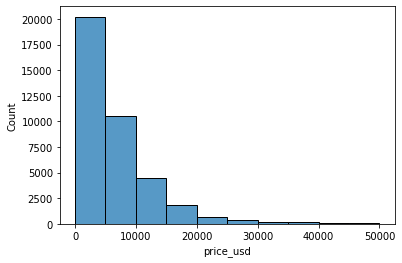

In [4]:
#B. Frec. con histograma
#Podemos ver que la mayoria de precios se encuentran en el rango de 0 a 10k
sns.histplot(data=df_cars['price_usd'], bins=10)

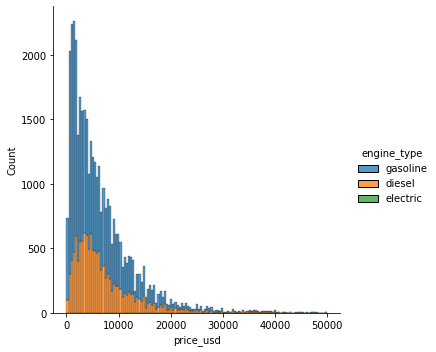

In [5]:
# C. Aqui visualizamos la frecuencia de tipo de motores con respecto a su motor.
# Vale la pena evaluar que los no se puede apreciar la cantidad de autos electricos

sns.displot(data=df_cars, hue='engine_type', x='price_usd', multiple='stack')

In [6]:
#D. Como vemos solo se contabilizan 10 autos electricos
df_cars.groupby(['engine_type']).count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


In [7]:
#E. Visualizaremos cuales son los precios de los Subaru Forester VS la cantidad de kilometros
# en una grafica de dispersion

forester = df_cars.loc[(df_cars['manufacturer_name'] == 'Subaru') & (df_cars['model_name'] == 'Forester'), :]
forester.head(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
6,Subaru,Forester,automatic,black,318280,1998,gasoline,False,gasoline,2.5,...,True,False,False,True,True,False,False,True,True,307


<AxesSubplot:xlabel='odometer_value', ylabel='price_usd'>

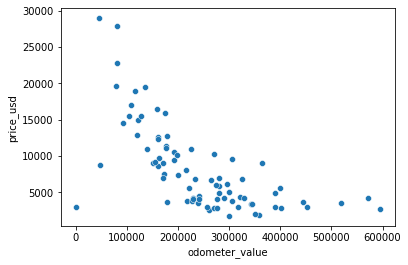

In [8]:
#visualizamos en un grafico de dispersion precio vs millas recorridasb
sns.scatterplot(data=forester, x='odometer_value', y='price_usd')

In [9]:
forester.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,80.000000,80.00000,80.000000,80.000000,80.000000,80.00000,80.000000
mean,240141.950000,2005.18750,2.318750,8255.028000,9.775000,22.55000,108.425000
std,115681.646014,5.91307,0.241878,5906.934814,6.087911,48.90391,192.698674
min,197.000000,1997.00000,2.000000,1700.000000,1.000000,1.00000,1.000000
25%,160000.000000,2000.00000,2.000000,3750.000000,6.000000,2.00000,20.250000
50%,229263.500000,2004.00000,2.500000,6750.000000,8.000000,5.00000,59.500000
75%,301250.000000,2010.00000,2.500000,11000.000000,13.000000,17.75000,97.500000
max,595457.000000,2017.00000,2.500000,28950.000000,28.000000,337.00000,1322.000000


Que se puede describir de los forester:
- Existen 80 autos subaru forester dentro de nuestra base de datos
- En promedio estos autos son del 2005
- Su precio de venta promedio es 5.9k


_________________________

## Medidas de Dispersion
Para mas info: [video demostrativo de IQR](https://www.youtube.com/watch?v=STSP8gTSdT8&t=438s)

<p align="Center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1200px-Boxplot_vs_PDF.svg.png" style="width: 400px;">
</p>
- Rango: El Rango es el intervalo entre el valor máximo y el valor mínimo.

- Cuartiles: Los cuartiles son valores que dividen una muestra de datos en cuatro partes iguales.
    - 1er Cuartil (1QR): 25% de los datos es menor que o igual a este valor.
    - 2do Cuartil (2QR): La mediana. 50% de los datos es menor que o igual a este valor.
    - 3er Cuartil (3QR): 75% de los datos es menor que o igual a este valor.

- Rango Intercuartil: La distancia entre el primer 1er cuartil y el 3er cuartil (Q3-Q1); de esta manera, abarca el 50% central de los datos.

- Diagrama de caja o box plot: representa gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, el diagrama de caja muestra a simple vista la mediana y los cuartiles de los datos. También puede representar los valores atípicos de estos.

### Desviacion Estándar
---------------------------------
<p align="Center">
<img src="https://datascienceparichay.com/wp-content/uploads/2021/09/standard-deviation-formula.png" style="width:600px">
</p>

La **desviación estándar** es la medida de dispersión más común, que indica qué tan dispersos están los datos con respecto a la media. Mientras mayor sea la desviación estándar, mayor será la dispersión de los datos. La desviación estándar se puede utilizar para establecer un valor de referencia para estimar la variación general de un proceso.

El **símbolo σ (sigma)** se utiliza frecuentemente para representar la desviación estándar de una población, mientras que se utiliza para representar la desviación estándar de una muestra.

### Varianza

<p align="Center">
<img src="https://image3.slideserve.com/7084253/variance-formula-l.jpg" style="width: 400px">
</p>

_La primera formula es con respecto a toda la poblacion y la segunda es con respecto a una muestra_

La **varianza** es una medida de dispersión que representa la variabilidad de una serie de datos respecto a su media. Formalmente se calcula como la suma de los residuos al cuadrado divididos entre el total de observaciones. 

**Cual es la diferencia entre la desviación estándar y la varianza**
La desviación estándar es la raíz cuadrada de la varianza. Básicamente, la desviación estándar observa cómo se distribuyen los datos desde la media. Por otro lado, la varianza estándar se usa para describir cuánto varían los datos de la media de todo el conjunto de datos.

Para entender a profundidad los calculos mirar [este video](https://www.youtube.com/watch?v=Uk98hiMQgN0)

**Vamos a calcular** en base al dataset de autos de segunda mano los siguientes parametros.

A. Mediana, rango.

B. El rango intercuartil (IQR)

C. Determinar intervalo de outliers $$[Q1 - 1.5.IQR , Q3+1.5.IQR]  $$



In [15]:
#A. Calculando en cuanto al precio. Mediana y rango

median_cars = df_cars['price_usd'].median()
min_price = df_cars['price_usd'].min()
max_price = df_cars['price_usd'].max()
rango_price = max_price - min_price
print(median_cars, rango_price)


4800.0 49999.0


In [19]:
#B. Rango intercuartil
Q1 = df_cars['price_usd'].quantile(0.25)
Q3 = df_cars['price_usd'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

6890.0


In [20]:
#C. Intervalo para outlier, si un auto baja de 
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

print(lower_fence, upper_fence)

-8235.0 19325.0


El intervalo anterior, solo determina dos puntos
- Tenemos una distribucion sesgada hacia la izquierda. Si todos los autos tienen un valor mayor a $0 porque el primer intervalo comienza en -8k
- Si un auto sobrepasa $\approx 20k$ es un outlier (valor atípico)

Tomando en cuenta el primer punto, evaluaremos a través de un histograma y diagrama de caja, como se encuentra estan distribuidos los precios.

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

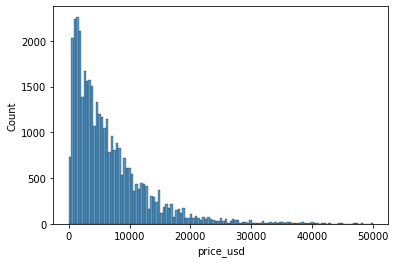

In [22]:
sns.histplot(data=df_cars , x='price_usd')

<AxesSubplot:xlabel='price_usd'>

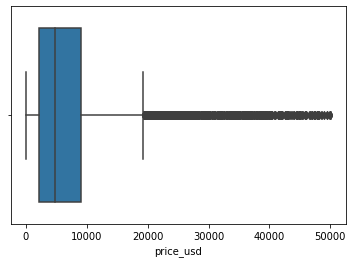

In [ ]:
sns.boxplot(data=df_cars, x='price_usd')

Los dos gráficos nos confirman una distribución sesgada hacia la izquierda/negativa,  lo cual nos representa un problema al analizar los datos. 
- El histograma nos dibuja una campana de gauss nos simétrica (con su pico no en el centro de su distribución)
- El diagrama de caja determina que los autos con valores > 20k son atipicos y tienen una mediana de 5k

Todos estos valores pudimos calcularlos de forma individual anteriormente y confirmarlos a traves de los gráficos.

### Diagramas de dispersión

Como sabemos las gráficas de dispersión nos sirven para evaluar la correlacion entre dos variables. Vamos a utilizar la libreria seaborn para verificar los tipos de scatterplot que podemos realizar.


In [23]:
#Trabajaremos con el famoso dataset de iris
import seaborn as sns
import pandas as pd

iris = sns.load_dataset('iris')


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

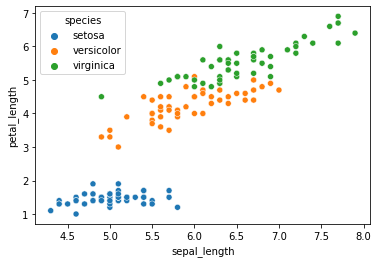

In [25]:
#vamos a evaluar por un diagrama de dispersion si el tamanio del sepal esta relacionado a los petalos.
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species', )

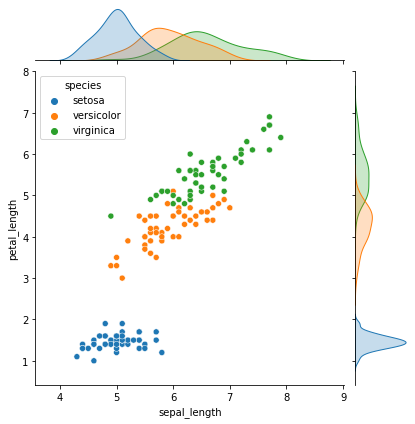

In [39]:
#Vamos a graficar con un joinplot las dispersiones y sus distribuciones.
sns.jointplot(data=iris, x='sepal_length', y='petal_length', hue='species')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

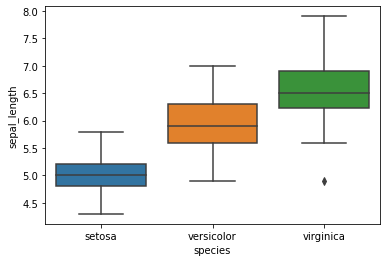

In [37]:
#Tambien podemos graficar con seaborn la distribucion de cada especie con respecto a su tamanio de sepalo
sns.boxplot(data=iris, x='species', y='sepal_length')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

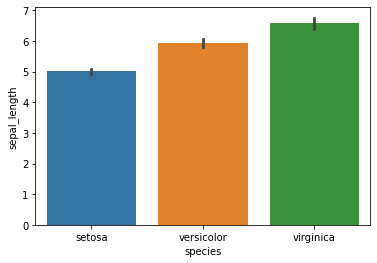

In [52]:
#Este barplot calcula la media del tamaño del sepalo con relacion a sus especies.
sns.barplot(data=iris, x='species', y='sepal_length')